In [1]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import json
from normalizer import subSample, getDataFromJSON, magDict
# Device configuration - If you have CUDA configured, you must use it. Try training with CPU and observe what happens
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Setting a seed for torch
torch.manual_seed(195322) 

/home/robjohnson/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
# This file has 77270 data points. 
%time train1, labels1 = subSample(path="data/train_partition1_data.json", device=device, earlyStop=5000)

Now reading data/train_partition1_data.json
Now loading event 1/785
Now loading event 101/785
Now loading event 201/785
Now loading event 301/785
Now loading event 401/785
Now loading event 501/785
Now loading event 601/785
Now loading event 701/785
785 lines loaded.
CPU times: user 28.8 s, sys: 3.02 s, total: 31.8 s
Wall time: 31.8 s


In [5]:
# This file has 93767 data points. 
%time train2, labels2 = subSample(path="data/train_partition2_data.json",device=device, earlyStop=5000)

Now reading data/train_partition2_data.json
Now loading event 1/300
Now loading event 101/300
Now loading event 201/300
300 lines loaded.
CPU times: user 26.2 s, sys: 5.28 s, total: 31.5 s
Wall time: 31.6 s


In [6]:
# This file has 42986 data points. 
%time train3, labels3 = subSample(path="data/train_partition3_data.json",device=device, earlyStop=5000)

Now reading data/train_partition3_data.json
Now loading event 1/585
Now loading event 101/585
Now loading event 201/585
Now loading event 301/585
Now loading event 401/585
Now loading event 501/585
585 lines loaded.
CPU times: user 19.8 s, sys: 1.52 s, total: 21.3 s
Wall time: 21.4 s


In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [8]:
t1 = [[train1[i, j, :].cpu().numpy().mean() for j in range(train1[i, :, :].shape[0])] for i in range(train1.shape[0])]
t1 = np.array(t1)
t2 = [[train2[i, j, :].cpu().numpy().mean() for j in range(train2[i, :, :].shape[0])] for i in range(train2.shape[0])]
t2 = np.array(t2)
t3 = [[train3[i, j, :].cpu().numpy().mean() for j in range(train3[i, :, :].shape[0])] for i in range(train3.shape[0])]
t3 = np.array(t3)

In [9]:
y = labels1 + labels2+ labels3

In [13]:
X = pd.DataFrame(np.concatenate([t1,t2,t3], axis = 0), columns = magDict.keys())
X

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,R_VALUE,RBZ_VALUE,RBT_VALUE,RBP_VALUE,FDIM,BZ_FDIM,BT_FDIM,BP_FDIM,PIL_LEN,XR_MAX
0,0.060793,0.045062,0.012009,0.065012,0.009815,0.017982,0.115723,0.847250,0.025876,0.096647,...,0.276402,0.559269,0.520013,0.255211,0.0,0.000223,0.001477,0.000211,0.052730,1.0
1,0.078708,0.164682,0.193010,0.078382,0.068215,0.044488,0.105814,0.939074,0.834311,0.920442,...,0.366461,0.419468,0.807042,0.791578,0.0,0.000000,0.001192,0.002979,0.000452,1.0
2,0.003945,0.002425,0.000839,0.004233,0.002299,0.004053,0.006160,0.960845,0.038151,0.164859,...,0.000000,0.020447,0.000000,0.000000,0.0,0.015850,0.007509,0.012514,0.000173,1.0
3,0.061924,0.048096,0.033875,0.062544,0.016292,0.016232,0.061165,0.912364,0.222543,0.600903,...,0.432230,0.521017,0.766407,0.731765,0.0,0.000000,0.005956,0.002978,0.000697,1.0
4,0.128512,0.130150,0.076341,0.123342,0.027858,0.029751,0.217723,0.751539,0.140315,0.427945,...,0.779540,0.681795,0.790899,0.732790,0.0,0.000000,0.001128,0.000282,0.074992,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,0.067514,0.047703,0.025042,0.100501,0.005979,0.012402,0.060194,0.874847,0.180899,0.613728,...,0.662611,0.713976,0.774694,0.796948,0.0,0.000000,0.004580,0.003435,0.002891,1.0
1666,0.295716,0.375056,0.223618,0.352335,0.259494,0.271762,0.476189,0.397829,0.282282,0.505814,...,0.948051,0.954582,0.893567,0.856033,0.0,0.005262,0.005539,0.001511,0.287255,1.0
1667,0.067098,0.067780,0.041502,0.108168,0.040761,0.064837,0.098807,0.843852,0.193223,0.568563,...,0.652621,0.713214,0.764466,0.726690,0.0,0.000000,0.000000,0.000000,0.003022,1.0
1668,0.052020,0.052557,0.031305,0.073201,0.025394,0.019858,0.066410,0.861888,0.249326,0.564695,...,0.715062,0.709480,0.752676,0.733475,0.0,0.001305,0.007869,0.000874,0.008018,1.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        82
           1       0.57      0.70      0.63        71
           2       0.53      0.47      0.50        87
           3       0.60      0.58      0.59        92
           4       0.81      0.67      0.73        86

    accuracy                           0.68       418
   macro avg       0.68      0.69      0.68       418
weighted avg       0.68      0.68      0.68       418



In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6794258373205742

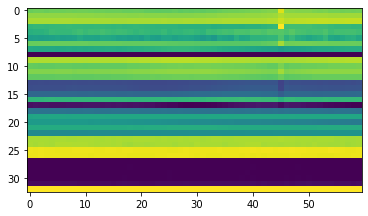

In [19]:
plt.imshow(train2[1])
plt.show()

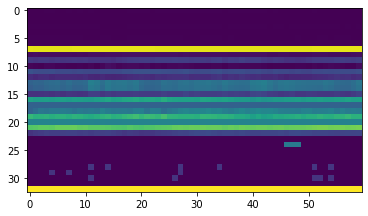

In [11]:
plt.imshow(train1[2])
plt.show()

In [ ]:


def tester(model, pathToWrite=None):
        if pathToWrite is None:
                pathToWrite = f'results/submission{datetime.now().strftime("%d_%H:%M")}.csv'
        # Get test data
        test, ids = getDataFromJSON(path='data/test_4_5_data.json', test=True, device=device)
        # get our guesses from the network
        guesses = model.predict(test)
        assert len(ids) == guesses.shape
        # Open a file to write to
        file = open(pathToWrite, mode='w')
        print('Id,Label', file=file)
        for i in range(len(ids)):
                print(ids[i], guesses[i], sep=',', file=file)
        file.close()

tester(model)